## Домашнее задание номер 3:

Коллеги подготовили для вас домашнее задание на классификацию. В рамках задания вам предлагается решить задачу и сразиться между собой в качестве. Задача на предсказание: согласится ли клиент на депозит. Найти задание можно по ссылке (для участия нужна регистрация на kaggle.com)
Нужно решить задачу с помощью 3х методов:
1. кнн
2. дерева принятия решения
3. логистической регрессии

и залить, на ваш взгляд, лучшее решение.

Это командное ДЗ, его нужно выполнить совместно с вашими коллегами. Коммит делается от одного выбранного участника. Для зачета нужно:
1. предоставить ноутбук с кодом, где вы попробовали все 3 метода
2. залить предсказания для теста и найти себя в лидерборде (скоро там появится бейзлайн - минимальное решение, которое нужно побить по качеству, чтобы получить зачет)

Команда, занявшая 1 место, получит дополнительный балл. Метрика качества ROC-AUC.

**Порядок сдачи**

Вовремя сделайте коммит на Kaggle, чтобы попасть в лидерборд. Не забудьте внутри ноутбука указать номер и состав команды.

## file description

* _id - идентификатор человека
* age - возраст
* job - тип работы ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
* marital - семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")
* education - уровень образования ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default - есть ли дефолт по кредиту ("no","yes","unknown")
* housing - есть ли кредит на жилье ("no","yes","unknown")
* loan - есть ли персональный кредит ("no","yes","unknown")
* contact - контактный тип связи ("cellular","telephone")
* month - последний контактный месяц года ("jan", "feb", "mar", ..., "nov", "dec")
* day_of_week - последний контактный день недели ("mon","tue","wed","thu","fri")
* duration - длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.
* campaign - количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)
* pdays - количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)
* previous - количество контактов, выполненных до текущей маркетинговой кампании для этого клиента
* poutcome - результат предыдущей маркетинговой кампании ("failure","nonexistent","success")

### ниже приведены показатели окружающей среды и банка
* emp.var.rate - изменение уровня занятости (квартальный показатель)
* cons.price.idx - индекс потребительских цен (ежемесячный показатель)
* cons.conf.idx - индекс доверия потребителя (ежемесячный показатель)
* euribor3m - курс Euribor (ежедневный показатель)
* nr.employed - количество сотрудников (квартальный показатель)
* target - целевая переменная (таргет) - согласился ли клиент на вклад (депозит)




In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pydot
from IPython.display import Image

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from ipywidgets import interact, IntSlider, FloatSlider

In [101]:
# read training file
train = pd.read_csv('train.csv', sep=',')

### Что за данные в файле:

In [102]:
train.shape

(24712, 22)

In [103]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
_id,24712,24712,31bd7c52afcf04d0f6657ebc83b079b8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,24712,NaN,NaN,NaN,40.0302,10.4623,17,32,38,47,98
job,24712,12,admin.,6254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,24712,4,married,14871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,24712,8,university.degree,7309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,24712,3,no,19567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,24712,3,yes,12934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,24712,3,no,20334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,24712,2,cellular,15729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,24712,10,may,8199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

### Преобразуем нужные текcтовые колонки в числовые и произведем прочие чистки данных

In [105]:
#for i in train.columns: # перебираем все столбцы
#    if str(train[i].dtype) == 'object' and i == "education" : # если тип столбца - object
#        print('='*10)
#        print(i) # выводим название столбца
#        print(set(train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
#        print('\n') # выводим пустую строку
        

# contact {'cellular', 'telephone'}
def ret_contact(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('cellular', 1)\
    .replace('telephone', 2)
    return ret

# job - тип работы 
## Присвоим с шагом наименьшие значения - безработным, домохозяйкам и непонятно кому, далее студентам, далее ...
#"admin.","blue-collar","entrepreneur","housemaid","management",
#"retired","self-employed","services","student","technician","unemployed","unknown"
def ret_job(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('admin.', 21)\
    .replace('blue-collar', 30)\
    .replace('entrepreneur', 40)\
    .replace('housemaid', 13)\
    .replace('management', 41)\
    .replace('retired', 11)\
    .replace('self-employed', 7)\
    .replace('services', 22)\
    .replace('student', 12)\
    .replace('technician', 31)\
    .replace('unemployed', 2)\
    .replace('unknown', 1)
    return ret

# month "jan", "feb", "mar", ..., "nov", "dec"
def ret_month(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('jan', 1)\
    .replace('feb', 2)\
    .replace('mar', 3)\
    .replace('apr', 4)\
    .replace('may', 5)\
    .replace('jun', 6)\
    .replace('jul', 7)\
    .replace('aug', 8)\
    .replace('sep', 9)\
    .replace('oct', 10)\
    .replace('nov', 11)\
    .replace('dec', 12)
    return ret

# marital семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")
def ret_marital(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('divorced', 1)\
    .replace('married', 2)\
    .replace('single', 3)\
    .replace('unknown', 4)
    return ret

# edication "basic.4y","basic.6y","basic.9y","high.school","illiterate",
#"professional.course","university.degree","unknown"
# разбросаем значения по шкале
def ret_education(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('basic.4y', 10)\
    .replace('basic.6y', 12)\
    .replace('basic.9y', 15)\
    .replace('high.school', 25)\
    .replace('illiterate', 30)\
    .replace('professional.course', 35)\
    .replace('university.degree', 45)\
    .replace('unknown', 1)
    return ret


# default - есть ли дефолт по кредиту ("no","yes","unknown")
# housing - есть ли кредит на жилье ("no","yes","unknown")
# loan - есть ли персональный кредит ("no","yes","unknown")
def ret_ynu(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('no', 40)\
    .replace('yes', 50)\
    .replace('unknown', 0)
    return ret


# poutcome 
def ret_poutcome(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('success', 100)\
    .replace('failure', 1)\
    .replace('nonexistent', 20)
    return ret


### Функция запускает чистку данных

In [106]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Удалим ненужные колонки
    df_output.drop('_id', inplace=True, axis=1)
    df_output.drop('day_of_week', inplace=True, axis=1)
    
    ## Добавим колонку для обработки этого замечания
    # duration - длительность последнего контакта в секундах. 
    # (Важное замечание: этот атрибут сильно влияет на таргет 
    # (например, если длительность - 0 сек., то таргет - 0). 
    # Тем не менее, продолжительность не известна до выполнения вызова.    
    df_output.insert(10,'is_0',df_input['duration'].map(lambda x: 1 if x == 0 else 0))
    
    # замена запятой на точку в числовых полях и преобразование в числовой тип
#    df_output['PERSONAL_INCOME'] = df_input['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
#        df_output['FAMILY_INCOME'] =  ret_fi(df_input['FAMILY_INCOME'])

# в следующей конструкции лямбда преобразует наны в пустые строковые значения, которые внутри функции присвоятся 0
    df_output['contact'] = ret_contact( df_input['contact'].map(lambda x: "" if pd.isnull(x) else x) )
    df_output['job'] = ret_job( df_input['job'].map(lambda x: "" if pd.isnull(x) else x) )
    df_output['month'] = ret_month( df_input['month'].map(lambda x: "" if pd.isnull(x) else x) )
    df_output['marital'] = ret_marital( df_input['marital'].map(lambda x: "" if pd.isnull(x) else x) )
    df_output['education'] = ret_education( df_input['education'].map(lambda x: "" if pd.isnull(x) else x) )
    df_output['default'] = ret_ynu( df_input['default'].map(lambda x: "" if pd.isnull(x) else x) )
    df_output['housing'] = ret_ynu( df_input['housing'].map(lambda x: "" if pd.isnull(x) else x) )
    df_output['loan'] = ret_ynu( df_input['loan'].map(lambda x: "" if pd.isnull(x) else x) )
    df_output['poutcome'] = ret_poutcome( df_input['poutcome'].map(lambda x: "" if pd.isnull(x) else x) )

    return df_output

In [107]:
## Почистим и преобразуем тренировочные данные в новую переменную train_preproc, посмотрим что получилось
train_preproc = train.pipe(preproc_data)
train_preproc.info()
train_preproc.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 21 columns):
age               24712 non-null int64
job               24712 non-null int64
marital           24712 non-null int64
education         24712 non-null int64
default           24712 non-null int64
housing           24712 non-null int64
loan              24712 non-null int64
contact           24712 non-null int64
month             24712 non-null int64
duration          24712 non-null int64
is_0              24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null int64
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: float64(5), int64(16)
memory usage: 4.0 MB


,count,mean,std,min,25%,50%,75%,max
age,24712.0,40.030188,10.462301,17.000,32.000,38.000,47.000,98.000
job,24712.0,24.920322,9.293492,1.000,21.000,22.000,31.000,41.000
marital,24712.0,2.177080,0.610203,1.000,2.000,2.000,3.000,4.000
education,24712.0,27.436590,14.023207,1.000,15.000,25.000,45.000,45.000
default,24712.0,31.674085,16.240278,0.000,40.000,40.000,40.000,50.000
housing,24712.0,44.227096,8.645551,0.000,40.000,50.000,50.000,50.000
loan,24712.0,40.513111,7.430342,0.000,40.000,40.000,40.000,50.000
contact,24712.0,1.363508,0.481019,1.000,1.000,1.000,2.000,2.000
month,24712.0,6.607438,2.035745,3.000,5.000,6.000,8.000,12.000
duration,24712.0,258.345298,261.573344,0.000,102.000,180.000,319.000,4918.000


In [108]:
train_preproc.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,54,31,2,35,0,40,40,1,8,87,...,1,999,0,20,1.4,93.444,-36.1,4.963,5228.1,0
1,36,22,3,10,40,40,40,2,5,291,...,1,999,0,20,1.1,93.994,-36.4,4.857,5191.0,0
2,53,30,2,10,40,50,40,1,8,182,...,1,999,0,20,1.4,93.444,-36.1,4.965,5228.1,0
3,34,30,2,15,40,50,50,2,5,180,...,2,999,0,20,1.1,93.994,-36.4,4.857,5191.0,0
4,29,22,3,45,40,50,40,2,8,6,...,1,999,0,20,-1.7,94.027,-38.3,0.890,4991.6,0


In [109]:
# to be continued...

## X - param values, y - target

In [175]:
X = train_preproc.iloc[:, :-1].values
y = train_preproc.iloc[:, -1].values
print(X.shape)
print(y.shape)
print(X[0])

(24712, 20)
(24712,)
[  5.40000000e+01   3.10000000e+01   2.00000000e+00   3.50000000e+01
   0.00000000e+00   4.00000000e+01   4.00000000e+01   1.00000000e+00
   8.00000000e+00   8.70000000e+01   0.00000000e+00   1.00000000e+00
   9.99000000e+02   0.00000000e+00   2.00000000e+01   1.40000000e+00
   9.34440000e+01  -3.61000000e+01   4.96300000e+00   5.22810000e+03]


# Decision Tree

In [111]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

try:
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold
    
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import randint as randint
from scipy.stats import uniform

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold


RND_SEED = 123


`validation_curve` позволяе исследовать влияние отдельного гиперпараметра модели на ее качество.

Построим валидационные кривые по гиперпараметру глубина дерева (`max_depth`) остальных гиперпараметрах, зафиксированных на значениях по-умолчанию

In [112]:
model = DecisionTreeClassifier(random_state=123)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)

train_scores, valid_scores = validation_curve(model, X, y, 
                                              'max_depth', range(1, 10),
                                              cv=cv, scoring='roc_auc')
# это значит, что мы будем проверять влияние параметра max_depth
# в дапозоне от 1 до 10
# и для этого мы будем использовать 5-fold кросс-валидацию
# с мерой качества mean_absolute_error.
# neg_ потому что по умолчанию в sklearn чем значение меры выше - тем лучше, 
# но в нашем случае нам нужно как раз допускать меньшую ошибку

Text(0,0.5,'ROC AUC')

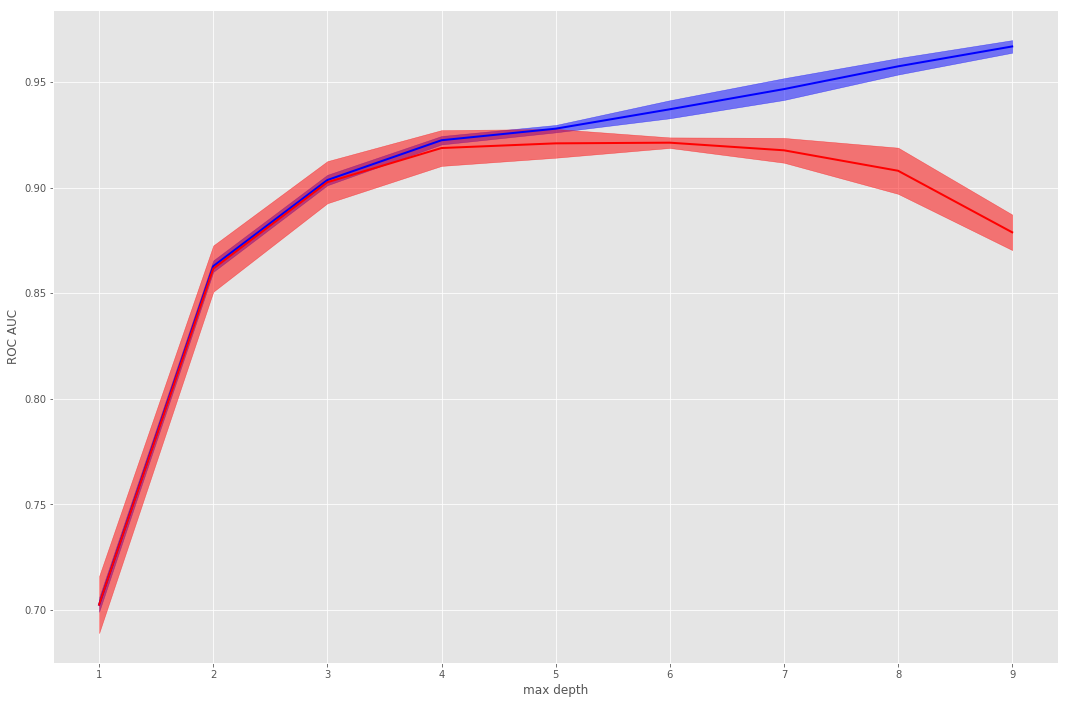

In [113]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,10), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,10), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,10), train_score_mean, c='b', lw=2)
plt.plot(range(1,10), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')

### Подбор гиперпараметров

In [114]:
# Определим пространство поиска

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 8),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced']}

# Некоторые параметры мы задали не простым перечислением значений, а 
# с помощью распределений.

# Будем делать 200 запусков поиска
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)
# А дальше, просто .fit()
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018364D37048>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183666700F0>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [115]:
random_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 9}

In [116]:
random_search.best_score_

0.93501727661720868

In [117]:
# Все прогоны. 
p = random_search.grid_scores_[0]
print(p)

mean: 0.92254, std: 0.00501, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 9}


G:\Python\Anaconda3\envs\SapML\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


### Важность признаков

Возьмем лучшую модель и выведем важность признаков

Каждое число соответствует важности признака, который подавался на вход

In [118]:
model = random_search.best_estimator_
for i in range(0,20):
    print(i, train_preproc.columns[i], model.feature_importances_[i])

0 age 0.0
1 job 0.0
2 marital 0.000253575658955
3 education 0.0
4 default 0.0
5 housing 0.0
6 loan 0.0
7 contact 0.00122735959199
8 month 0.0855028130752
9 duration 0.517578881527
10 is_0 0.0
11 campaign 0.000222878809518
12 pdays 0.00825684134564
13 previous 0.0
14 poutcome 0.00128427335261
15 emp.var.rate 0.0673851623145
16 cons.price.idx 0.00428784091223
17 cons.conf.idx 0.00140680244731
18 euribor3m 0.0303126597062
19 nr.employed 0.282280911259


In [119]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("model") 

'model.pdf'

## Применим на тестовой выборке

### прогоним тестовые данные через очистку, сохраним отдельно столбец ID - он нужен для итога

In [120]:
# read training file
test = pd.read_csv('test.csv', sep=',')

In [121]:
test_IDs = test['_id']

In [122]:
test.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [94]:
## Почистим и преобразуем тестовые данные в новую переменную test_preproc, посмотрим что получилось
test_preproc = test.pipe(preproc_data)

## X_test - param values, y_test- target

In [185]:
X_test = test_preproc.iloc[:, :].values
y_test = np.zeros((X_test.shape[0],), dtype=np.int_)

In [186]:
y_test = model.predict(X_test)

In [198]:
result_of_tree = pd.DataFrame()
result_of_tree['_id'] = test_IDs
result_of_tree['target'] = y_test

## Результат работы Дерева Решений запихнем в файл требуемого формата

In [204]:
result_of_tree.to_csv('result_of_tree.csv', index=False)

In [213]:
# для проверки добавим столбец таргет к тестовой выборке и посмотрим в каких строках 1
result_of_tree_full = test.copy()
result_of_tree_full['target'] = y_test
result_of_tree_full.to_csv('result_of_tree_full.csv', index=True, sep=';')